In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel("C:\\Users\\user\\Desktop\\machine\\data_1017.xlsx",sheet_name="Sheet1")
label_encoder = LabelEncoder()

df = df.drop(['fixed_type','ht_omr_data'], axis=1)

In [2]:
df

,sex,sc_code,age,FG,t1,t2,t3,t4,t5,t6,...,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27
0,1,3,32,0,48,55,57,54,46,59,...,68,44,62,37,49,53,51,46,39,61
1,1,1,39,0,61,56,61,60,50,57,...,26,42,41,30,39,43,54,44,57,41
2,1,4,39,0,46,36,51,52,46,52,...,44,43,55,47,44,44,48,45,43,65
3,2,3,34,0,46,54,46,61,48,59,...,34,44,41,36,46,44,40,46,41,57
4,1,2,34,0,37,39,46,50,44,57,...,61,42,45,46,42,43,42,44,41,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,1,3,39,0,44,51,51,56,58,57,...,57,43,41,41,44,51,53,45,58,53
30867,1,1,29,0,43,53,43,49,43,46,...,66,52,80,60,55,60,45,57,47,38
30868,2,1,38,0,45,35,53,42,44,45,...,57,51,47,64,52,43,41,43,40,39
30869,2,1,18,0,43,51,50,44,51,52,...,54,45,41,40,50,42,50,46,42,45


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['FG'])

y = df['FG']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000, stratify=y)

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 기본 모델 정의
model = SVC(random_state=1000, probability=True)  # SVC는 확률 예측을 위해 probability=True 설정

# 파라미터 범위 설정 (랜덤으로 선택할 값들)
param_dist = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # C 값을 로그 스케일로 설정 (0.001 ~ 100)
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # 다양한 커널 함수
    'gamma': ['scale', 'auto'],  # gamma 설정
    'class_weight': ['balanced']  # 클래스 가중치 설정
}

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist, 
                                   n_iter=10,  # 테스트할 파라미터 조합 수
                                   scoring='roc_auc',  # AUC를 기준으로 평가
                                   cv=5,  # 교차 검증 수행
                                   verbose=2,  # 출력 정보
                                   random_state=1000, 
                                   n_jobs=1)  # 모든 CPU 코어 사용


# 모델 학습
random_search.fit(x_train, y_train)

# 최적 파라미터 및 성능 출력
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_auc = random_search.best_score_

print(f"\n최적의 파라미터: {best_params}")
print(f"최적 모델의 AUC (CV 기준): {best_auc:.4f}")

# 최적 모델로 테스트 데이터 예측
y_pred_best = best_model.predict(x_test)

# 성능 확인 (혼동 행렬 및 분류 보고서)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# 테스트 데이터에서 최종 AUC 계산
y_pred_proba = best_model.predict_proba(x_test)[:, 1]  # 확률값으로 AUC 계산 (1 클래스 확률 사용)
final_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n최종 테스트 데이터 AUC: {final_auc:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=sigmoid; total time=  59.6s
[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=sigmoid; total time= 1.0min
[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=sigmoid; total time=  60.0s
[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=sigmoid; total time=  59.6s
[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=sigmoid; total time=  58.8s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   3.4s
[CV] END C=0.001, class_weight=balanced, gamma=scale, kernel=rbf; total time= 1.6min
[CV]

Accuracy: 0.9804048582995951


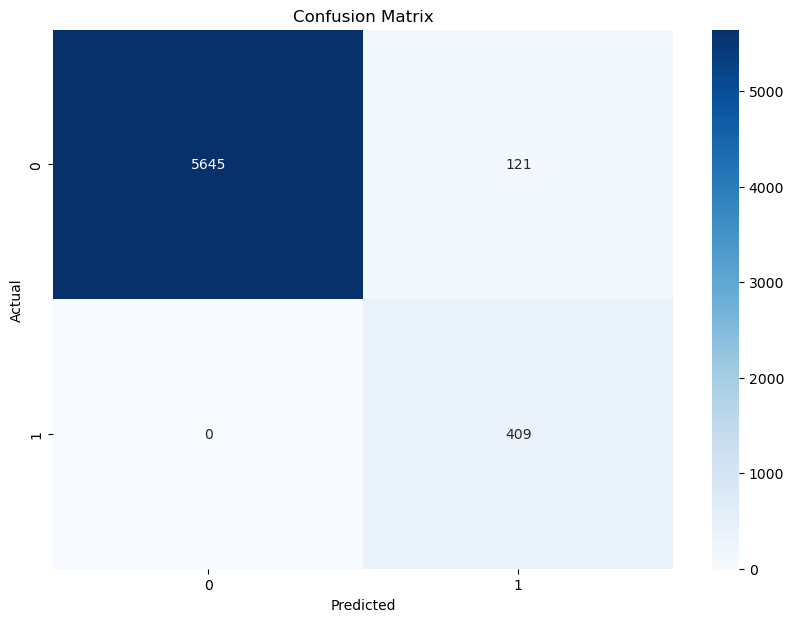

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5766
           1       0.77      1.00      0.87       409

    accuracy                           0.98      6175
   macro avg       0.89      0.99      0.93      6175
weighted avg       0.98      0.98      0.98      6175

Balanced Accuracy: 0.9895
F1-Score: 0.8711
Precision: 0.7717
Recall: 1.0000
ROC-AUC: 1.0000


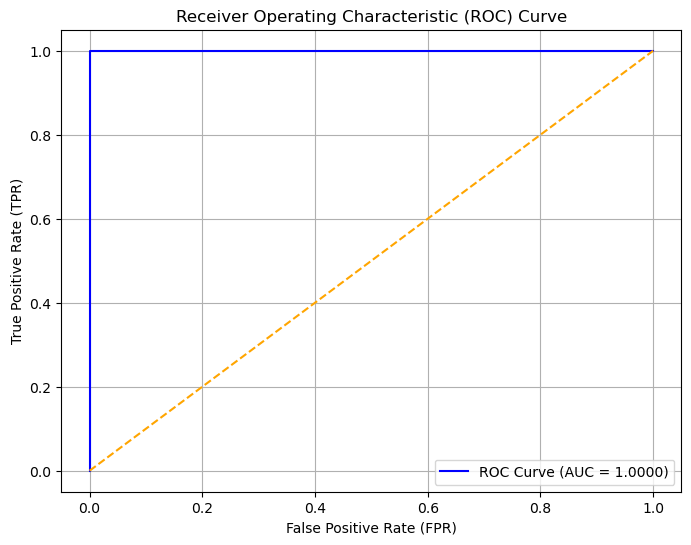

Cohen's Kappa: 0.8607
Matthews Correlation Coefficient (MCC): 0.8692


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, roc_auc_score, f1_score, precision_score, recall_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 테스트 데이터로 예측 수행
y_pred = best_model.predict(x_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report (Precision, Recall, F1-Score 포함)
class_report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", class_report)

# Balanced Accuracy (클래스 불균형 문제 해결을 위한 정확도)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# SVM에서는 확률 예측을 위해 probability=True 설정이 필요
y_pred_proba = best_model.predict_proba(x_test)[:, 1]  # 확률 예측 (1 클래스에 대한 확률 사용)

# ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Cohen's Kappa 계산
cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohen_kappa:.4f}")

# Matthews Correlation Coefficient (MCC) 계산
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


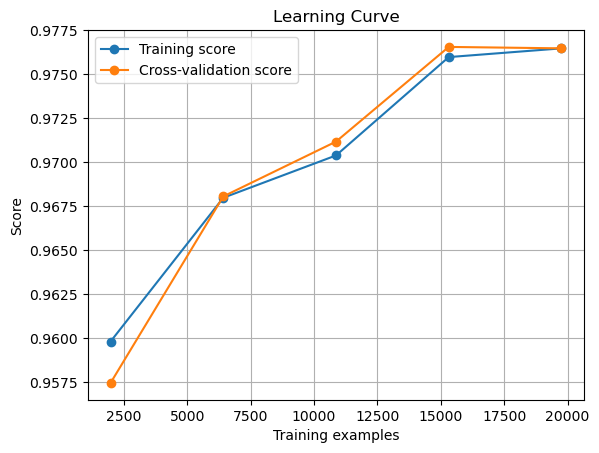

In [12]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_model, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# 학습 곡선 그리기
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.grid()
plt.show()
